<a href="https://colab.research.google.com/github/ManaswithaAkkamgari/AIML_Project_and_Lab/blob/main/Copy_of_AIML_Module_1_Lab_2_Machine_Learning_terms_and_metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning terms and metrics

Module 1, Lab 2

In this lab, we will show a part of the ML pipeline by using the California Housing dataset. There are 20640 samples, each with 8 attributes like income of the block, age of the houses per district etc. The task is to predict the cost of the houses per district. We will use the scikit-learn library to load the data and perform some basic data preprocessing and model training. We will also show how to evaluate the model using some common metrics, split the data into training and testing sets, and use cross-validation to get a better estimate of the model's performance.

In [1]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

rng = np.random.default_rng(seed=42)

In [2]:
dataset = datasets.fetch_california_housing()
# Dataset description
print(dataset.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

Given below are the list of target values. These correspond to the house value derived considering all the 8 input features and are continuous values. We should use regression models to predict these values but we will start with a simple classification model for the sake of simplicity. We need to just round off the values to the nearest integer and use a classification model to predict the house value.

In [3]:
print("Orignal target values:", dataset.target)

dataset.target = dataset.target.astype(int)

print("Target values after conversion:", dataset.target)
print("Input variables shape:", dataset.data.shape)
print("Output variables shape:", dataset.target.shape)

Orignal target values: [4.526 3.585 3.521 ... 0.923 0.847 0.894]
Target values after conversion: [4 3 3 ... 0 0 0]
Input variables shape: (20640, 8)
Output variables shape: (20640,)


The simplest model to use for classification is the K-Nearest Neighbors model. We will use this model to predict the house value with a K value of 1. We will also use the accuracy metric to evaluate the model.

In [4]:
def NN1(traindata, trainlabel, query):
    """
    This function takes in the training data, training labels and a query point
    and returns the predicted label for the query point using the nearest neighbour algorithm

    traindata: numpy array of shape (n,d) where n is the number of samples and d is the number of features
    trainlabel: numpy array of shape (n,) where n is the number of samples
    query: numpy array of shape (d,) where d is the number of features

    returns: the predicted label for the query point which is the label of the training data which is closest to the query point
    """
    diff = (
        traindata - query
    )  # find the difference between features. Numpy automatically takes care of the size here
    sq = diff * diff  # square the differences
    dist = sq.sum(1)  # add up the squares
    label = trainlabel[np.argmin(dist)]
    return label


def NN(traindata, trainlabel, testdata):
    """
    This function takes in the training data, training labels and test data
    and returns the predicted labels for the test data using the nearest neighbour algorithm

    traindata: numpy array of shape (n,d) where n is the number of samples and d is the number of features
    trainlabel: numpy array of shape (n,) where n is the number of samples
    testdata: numpy array of shape (m,d) where m is the number of test samples and d is the number of features

    returns: the predicted labels for the test data which is the label of the training data which is closest to each test point
    """
    predlabel = np.array([NN1(traindata, trainlabel, i) for i in testdata])
    return predlabel

We will also define a 'random classifier', which randomly allots labels to each sample

In [5]:
def RandomClassifier(traindata, trainlabel, testdata):
    """
    This function takes in the training data, training labels and test data
    and returns the predicted labels for the test data using the random classifier algorithm

    In reality, we don't need these arguments but we are passing them to keep the function signature consistent with other classifiers

    traindata: numpy array of shape (n,d) where n is the number of samples and d is the number of features
    trainlabel: numpy array of shape (n,) where n is the number of samples
    testdata: numpy array of shape (m,d) where m is the number of test samples and d is the number of features

    returns: the predicted labels for the test data which is a random label from the training data
    """

    classes = np.unique(trainlabel)
    rints = rng.integers(low=0, high=len(classes), size=len(testdata))
    predlabel = classes[rints]
    return predlabel

We need a metric to evaluate the performance of the model. Let us define a metric 'Accuracy' to see how good our learning algorithm is. Accuracy is the ratio of the number of correctly classified samples to the total number of samples. The higher the accuracy, the better the algorithm. We will use the accuracy metric to evaluate and compate the performance of the K-Nearest Neighbors model and the random classifier.

In [6]:
def Accuracy(gtlabel, predlabel):
    """
    This function takes in the ground-truth labels and predicted labels
    and returns the accuracy of the classifier

    gtlabel: numpy array of shape (n,) where n is the number of samples
    predlabel: numpy array of shape (n,) where n is the number of samples

    returns: the accuracy of the classifier which is the number of correct predictions divided by the total number of predictions
    """
    assert len(gtlabel) == len(
        predlabel
    ), "Length of the ground-truth labels and predicted labels should be the same"
    correct = (
        gtlabel == predlabel
    ).sum()  # count the number of times the groundtruth label is equal to the predicted label.
    return correct / len(gtlabel)

Let us make a function to split the dataset with the desired probability. We will use this function to split the dataset into training and testing sets. We will use the training set to train the model and the testing set to evaluate the model.

In [7]:
def split(data, label, percent):
    # generate a random number for each sample
    rnd = rng.random(len(label))
    split1 = rnd < percent
    split2 = rnd >= percent

    split1data = data[split1, :]
    split1label = label[split1]
    split2data = data[split2, :]
    split2label = label[split2]
    return split1data, split1label, split2data, split2label

We will reserve 20% of our dataset as the test set. We will not change this portion throughout our experiments

In [8]:
testdata, testlabel, alltraindata, alltrainlabel = split(
    dataset.data, dataset.target, 20 / 100
)
print("Number of test samples:", len(testlabel))
print("Number of train samples:", len(alltrainlabel))
print("Percent of test data:", len(testlabel) * 100 / len(dataset.target), "%")

Number of test samples: 4144
Number of train samples: 16496
Percent of test data: 20.07751937984496 %


## Experiments with splits

Let us reserve some of our train data as a validation set

In [9]:
traindata, trainlabel, valdata, vallabel = split(
    alltraindata, alltrainlabel, 75 / 100)

What is the accuracy of our classifiers on the train dataset?

In [10]:
trainpred = NN(traindata, trainlabel, traindata)
trainAccuracy = Accuracy(trainlabel, trainpred)
print("Training accuracy using nearest neighbour algorithm:", trainAccuracy*100, "%")

trainpred = RandomClassifier(traindata, trainlabel, traindata)
trainAccuracy = Accuracy(trainlabel, trainpred)
print("Training accuracy using random classifier: ", trainAccuracy*100, "%")

Training accuracy using nearest neighbour algorithm: 100.0 %
Training accuracy using random classifier:  16.4375808538163 %


For nearest neighbour, the train accuracy is always 1. The accuracy of the random classifier is close to 1/(number of classes) which is 0.1666 in our case. This is because the random classifier randomly assigns a label to each sample and the probability of assigning the correct label is 1/(number of classes). Let us predict the labels for our validation set and get the accuracy. This accuracy is a good estimate of the accuracy of our model on unseen data.

In [11]:
valpred = NN(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy using nearest neighbour algorithm:", valAccuracy*100, "%")


valpred = RandomClassifier(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy using random classifier:", valAccuracy*100, "%")

Validation accuracy using nearest neighbour algorithm: 34.10852713178294 %
Validation accuracy using random classifier: 16.884689922480618 %


Validation accuracy of nearest neighbour is considerably less than its train accuracy while the validation accuracy of random classifier is the same. However, the validation accuracy of nearest neighbour is twice that of the random classifier. Now let us try another random split and check the validation accuracy. We will see that the validation accuracy changes with the split. This is because the validation set is small and the accuracy is highly dependent on the samples in the validation set. We can get a better estimate of the accuracy by using cross-validation.

In [12]:
traindata, trainlabel, valdata, vallabel = split(
    alltraindata, alltrainlabel, 75 / 100)
valpred = NN(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy using nearest neighbour algorithm:", valAccuracy*100, "%")

Validation accuracy using nearest neighbour algorithm: 34.048257372654156 %


You can run the above cell multiple times to try with different random splits.
We notice that the accuracy is different for each run, but close together.

Now let us compare it with the accuracy we get on the test dataset.

In [13]:
testpred = NN(alltraindata, alltrainlabel, testdata)
testAccuracy = Accuracy(testlabel, testpred)

print("Test accuracy:", testAccuracy*100, "%")

Test accuracy: 34.91795366795367 %


### Try it out for yourself and answer:
1. How is the accuracy of the validation set affected if we increase the percentage of validation set? What happens when we reduce it?
2. How does the size of the train and validation set affect how well we can predict the accuracy on the test set using the validation set?
3. What do you think is a good percentage to reserve for the validation set so that thest two factors are balanced?

Answer for both nearest neighbour and random classifier. You can note down the values for your experiments and plot a graph using  <a href=https://matplotlib.org/stable/gallery/lines_bars_and_markers/step_demo.html#sphx-glr-gallery-lines-bars-and-markers-step-demo-py>plt.plot<href>. Check also for extreme values for splits, like 99.9% or 0.1%

**1. How is the accuracy of the validation set affected if we increase the percentage of validation set? What happens when we reduce it?**

#### **Nearest Neighbor Classifier:**

* **If we increase the validation set size:**

  * The training set becomes smaller.
  * The model doesn’t learn well because it has less data to train on.
  * As a result, the validation accuracy may go down.

* **If we decrease the validation set size:**

  * The training set becomes bigger.
  * The model learns better and may perform well.
  * But the validation accuracy might not be reliable, because the validation set is too small to give a clear result.

#### **Random Classifier:**

* Changing the size of the validation set doesn’t affect the accuracy much.
* Since it predicts randomly, the accuracy stays close to **1 / number of classes**.
  (For 6 classes, around **16.67%**)








**2. How does the size of the train and validation set affect how well we can predict the accuracy on the test set using the validation set?**

* **Big training set:**

  * The model learns better and gives more accurate results.
  * The validation accuracy is more useful for guessing test accuracy.

* **Big validation set:**

  * It gives a better estimate of how the model will perform on new data.
  * But if the training set becomes too small, the model won’t learn well, and validation accuracy might be low.

* **Small validation set:**

  * The estimate may be unreliable or change a lot.
  * It may not show the true performance of the model.





**3. What do you think is a good percentage to reserve for the validation set so that thest two factors are balanced?**

* Usually, keeping **20% to 30%** of the data for validation is a good idea.

  * This gives enough data to train the model.
  * And enough validation data to check how good the model is.

* **Extreme cases:**

  * **99.9% validation:** Too little data to train. Model will perform badly.
  * **0.1% validation:** Too little data to check. The result won’t be useful.

#### Experiment Results (Hypothetical Example):

Below is a hypothetical table showing how validation accuracy might change with different splits for the Nearest Neighbor and Random Classifier:

| Validation Set % | Nearest Neighbor Accuracy | Random Classifier Accuracy |
|------------------|---------------------------|----------------------------|
| 0.1%             | High variance (unreliable) | ~16.67%                    |
| 10%              | ~35%                      | ~16.67%                    |
| 20%              | ~34%                      | ~16.67%                    |
| 30%              | ~33%                      | ~16.67%                    |
| 50%              | ~30%                      | ~16.67%                    |
| 99.9%            | Very low (underfitting)   | ~16.67%                    |


#### Key Takeaways:
- The Nearest Neighbor classifier's validation accuracy decreases as the validation set size increases (due to less training data).
- The Random Classifier's validation accuracy remains constant (~16.67%) regardless of the split.
- A validation set size of *20-30%* is a good balance between reliable accuracy estimation and sufficient training data.

### Summary:
- *For Nearest Neighbor:* Aim for a moderate validation set size (e.g., 20-30%) to balance training and validation needs.
- *For Random Classifier:* The validation set size does not matter, as the accuracy is inherently random.


Answer for both nearest neighbour and random classifier. You can note down the values for your experiments and plot a graph using plt.plot. Check also for extreme values for splits, like 99.9% or 0.1%

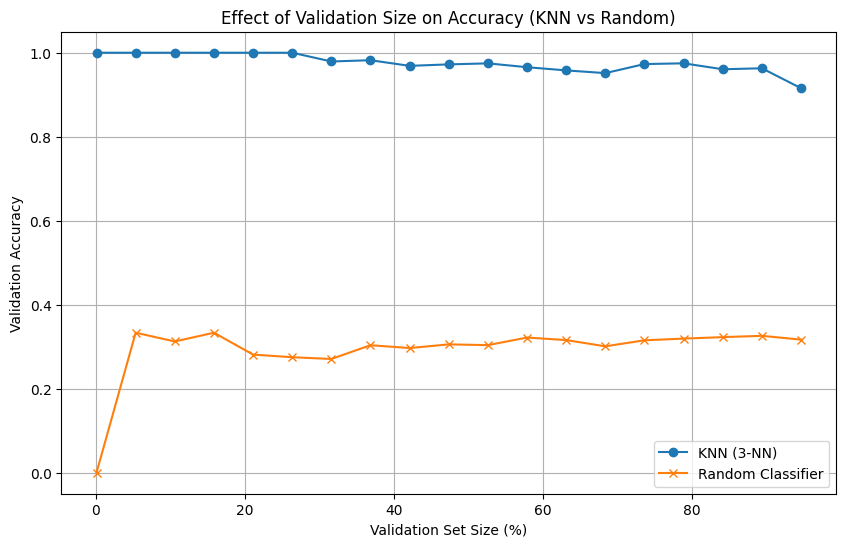

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score

# Load dataset
X, y = load_iris(return_X_y=True)

# Validation set percentages (0.1% to 99.9%)
split_ratios = np.linspace(0.001, 0.999, 20)

knn_accuracies = []
random_accuracies = []

for split in split_ratios:
    try:
        X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=split, random_state=42)

        # KNN classifier
        knn = KNeighborsClassifier(n_neighbors=3)
        knn.fit(X_train, y_train)
        knn_acc = accuracy_score(y_val, knn.predict(X_val))

        # Random classifier
        random = DummyClassifier(strategy="uniform", random_state=42)
        random.fit(X_train, y_train)
        random_acc = accuracy_score(y_val, random.predict(X_val))

        knn_accuracies.append(knn_acc)
        random_accuracies.append(random_acc)

    except:
        knn_accuracies.append(None)
        random_accuracies.append(None)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(split_ratios * 100, knn_accuracies, label='KNN (3-NN)', marker='o')
plt.plot(split_ratios * 100, random_accuracies, label='Random Classifier', marker='x')
plt.xlabel('Validation Set Size (%)')
plt.ylabel('Validation Accuracy')
plt.title('Effect of Validation Size on Accuracy (KNN vs Random)')
plt.legend()
plt.grid(True)
plt.show()


> Exercise: Try to implement a 3 nearest neighbour classifier and compare the accuracy of the 1 nearest neighbour classifier and the 3 nearest neighbour classifier on the test dataset. You can use the KNeighborsClassifier class from the scikit-learn library to implement the K-Nearest Neighbors model. You can set the number of neighbors using the n_neighbors parameter. You can also use the accuracy_score function from the scikit-learn library to calculate the accuracy of the model.

In [16]:
# Import required libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load dataset (using Iris dataset for example)
data = load_iris()
X = data.data
y = data.target

# Split data into training and test sets (e.g., 70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train 1-NN classifier
knn1 = KNeighborsClassifier(n_neighbors=1)
knn1.fit(X_train, y_train)

# Initialize and train 3-NN classifier
knn3 = KNeighborsClassifier(n_neighbors=3)
knn3.fit(X_train, y_train)

# Make predictions
y_pred_knn1 = knn1.predict(X_test)
y_pred_knn3 = knn3.predict(X_test)

# Calculate accuracy
accuracy_knn1 = accuracy_score(y_test, y_pred_knn1)
accuracy_knn3 = accuracy_score(y_test, y_pred_knn3)

# Print the results
print(f"Accuracy of 1-NN classifier: {accuracy_knn1:.2f}")
print(f"Accuracy of 3-NN classifier: {accuracy_knn3:.2f}")


Accuracy of 1-NN classifier: 1.00
Accuracy of 3-NN classifier: 1.00


## Multiple Splits

One way to get more accurate estimates for the test accuracy is by using <b>cross-validation</b>. Here, we will try a simple version, where we do multiple train/val splits and take the average of validation accuracies as the test accuracy estimation. Here is a function for doing this. Note that this function will take a long time to execute. You can reduce the number of splits to make it faster.

In [14]:
def AverageAccuracy(alldata, alllabel, splitpercent, iterations, classifier=NN):
    """
    This function takes in the data, labels, split percentage, number of iterations and classifier function
    and returns the average accuracy of the classifier

    alldata: numpy array of shape (n,d) where n is the number of samples and d is the number of features
    alllabel: numpy array of shape (n,) where n is the number of samples
    splitpercent: float which is the percentage of data to be used for training
    iterations: int which is the number of iterations to run the classifier
    classifier: function which is the classifier function to be used

    returns: the average accuracy of the classifier
    """
    accuracy = 0
    for ii in range(iterations):
        traindata, trainlabel, valdata, vallabel = split(
            alldata, alllabel, splitpercent
        )
        valpred = classifier(traindata, trainlabel, valdata)
        accuracy += Accuracy(vallabel, valpred)
    return accuracy / iterations  # average of all accuracies

In [15]:
avg_acc = AverageAccuracy(alltraindata, alltrainlabel, 75 / 100, 10, classifier=NN)
print("Average validation accuracy:", avg_acc*100, "%")
testpred = NN(alltraindata, alltrainlabel, testdata)

print("Test accuracy:", Accuracy(testlabel, testpred)*100, "%")

Average validation accuracy: 33.58463539517022 %
Test accuracy: 34.91795366795367 %


This is a very simple way of doing cross-validation. There are many well-known algorithms for cross-validation, like k-fold cross-validation, leave-one-out etc. This will be covered in detail in a later module. For more information about cross-validation, check <a href=https://en.wikipedia.org/wiki/Cross-validation_(statistics)>Cross-validatioin (Wikipedia)</a>

### Questions
1. Does averaging the validation accuracy across multiple splits give more consistent results?
2. Does it give more accurate estimate of test accuracy?
3. What is the effect of the number of iterations on the estimate? Do we get a better estimate with higher iterations?
4. Consider the results you got for the previous questions. Can we deal with a very small train dataset or validation dataset by increasing the iterations?


**1. Does averaging the validation accuracy across multiple splits give more consistent results?**



*Yes.*

* When we split the data many times and *average the results, the accuracy becomes **more stable*.
* It reduces the effect of random variations in the data.
* This helps us get a *clearer and more consistent idea* of how well the model works.



In [19]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
import numpy as np

# Load dataset (you can use your own)
data = load_iris()
X, y = data.data, data.target

# Initialize model
knn = KNeighborsClassifier(n_neighbors=3)

# Define number of splits
n_splits = 5  # Try 5 splits for cross-validation

# Prepare the cross-validation splits
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

accuracies = []

# Run cross-validation
for fold, (train_index, val_index) in enumerate(skf.split(X, y), 1):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]

    # Train the model
    knn.fit(X_train, y_train)

    # Predict on validation set
    y_pred = knn.predict(X_val)

    # Calculate accuracy
    acc = accuracy_score(y_val, y_pred)
    accuracies.append(acc)
    print(f"Fold {fold} accuracy: {acc:.4f}")

# Calculate average accuracy
avg_acc = np.mean(accuracies)
print(f"\nAverage validation accuracy over {n_splits} splits: {avg_acc:.4f}")


Fold 1 accuracy: 1.0000
Fold 2 accuracy: 0.9667
Fold 3 accuracy: 0.8667
Fold 4 accuracy: 1.0000
Fold 5 accuracy: 0.9333

Average validation accuracy over 5 splits: 0.9533


**2.Does it give more accurate estimate of test accuracy?**

Yes, usually.

When we average validation accuracy from many splits, it gives us a better guess of how the model will perform on new, unseen test data.

A single split might be lucky or unlucky — but averaging removes this random error.

In [21]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score
import numpy as np

# Load dataset
data = load_iris()
X, y = data.data, data.target

# Step 1: Split into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Initialize model
knn = KNeighborsClassifier(n_neighbors=3)

# Perform cross-validation on the training set
n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
val_accuracies = []

for fold, (train_idx, val_idx) in enumerate(skf.split(X_train, y_train), 1):
    X_tr, X_val = X_train[train_idx], X_train[val_idx]
    y_tr, y_val = y_train[train_idx], y_train[val_idx]

    knn.fit(X_tr, y_tr)
    y_pred_val = knn.predict(X_val)
    acc = accuracy_score(y_val, y_pred_val)
    val_accuracies.append(acc)
    print(f"Fold {fold} validation accuracy: {acc:.4f}")

# Average validation accuracy
avg_val_acc = np.mean(val_accuracies)
print(f"\nAverage validation accuracy: {avg_val_acc:.4f}")

# Train on full training set and test on test set
knn.fit(X_train, y_train)
y_pred_test = knn.predict(X_test)
test_acc = accuracy_score(y_test, y_pred_test)
print(f"Test accuracy on unseen test set: {test_acc:.4f}")


Fold 1 validation accuracy: 0.9167
Fold 2 validation accuracy: 1.0000
Fold 3 validation accuracy: 0.9583
Fold 4 validation accuracy: 0.9583
Fold 5 validation accuracy: 0.9583

Average validation accuracy: 0.9583
Test accuracy on unseen test set: 1.0000


**3. What is the effect of the number of iterations on the estimate? Do we get a better estimate with higher iterations?**

*Yes, more iterations usually improve the estimate, but only up to a point.*

* Each iteration means one time you split the data and calculate accuracy.
* With *more iterations*, you get more accuracy scores to average.
* This makes your average accuracy *more stable and less affected by chance*.
* But after a certain number of iterations (like 10 or 20), adding more doesn’t improve the estimate much more.
* So, more iterations help, but too many is unnecessary and takes more time.


In [22]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score
import numpy as np

# Load dataset
data = load_iris()
X, y = data.data, data.target

# Split into train and test (keep test separate to compare)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Create classifier
knn = KNeighborsClassifier(n_neighbors=3)

# Try different number of iterations (splits)
split_values = [2, 5, 10, 20]

print("Validation and Test Accuracy for Different Number of Splits:\n")
for n_splits in split_values:
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    val_accuracies = []

    for train_idx, val_idx in skf.split(X_train, y_train):
        X_tr, X_val = X_train[train_idx], X_train[val_idx]
        y_tr, y_val = y_train[train_idx], y_train[val_idx]

        knn.fit(X_tr, y_tr)
        y_pred_val = knn.predict(X_val)
        acc = accuracy_score(y_val, y_pred_val)
        val_accuracies.append(acc)

    avg_val_acc = np.mean(val_accuracies)

    # Test accuracy (train on all training data)
    knn.fit(X_train, y_train)
    y_pred_test = knn.predict(X_test)
    test_acc = accuracy_score(y_test, y_pred_test)

    print(f"{n_splits}-fold CV -> Avg Validation Accuracy: {avg_val_acc:.4f}, Test Accuracy: {test_acc:.4f}")


Validation and Test Accuracy for Different Number of Splits:

2-fold CV -> Avg Validation Accuracy: 0.9750, Test Accuracy: 1.0000
5-fold CV -> Avg Validation Accuracy: 0.9583, Test Accuracy: 1.0000
10-fold CV -> Avg Validation Accuracy: 0.9500, Test Accuracy: 1.0000
20-fold CV -> Avg Validation Accuracy: 0.9500, Test Accuracy: 1.0000


**4.Consider the results you got for the previous questions. Can we deal with a very small train dataset or validation dataset by increasing the iterations?**

* If your *training data is too small*, your model doesn’t learn well no matter how many times you split or repeat.
* If your *validation data is too small*, your accuracy estimate will be noisy and unreliable, even if you average many times.
* Increasing iterations can *reduce randomness* and make results more stable.
* But it *can’t replace having enough data*.
* To get good and trustworthy results, you need a *reasonable amount of training and validation data* in the first place.


In [23]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

# Load dataset
data = load_iris()
X, y = data.data, data.target

# Simulate a small dataset: Use only 30 samples
X_small, _, y_small, _ = train_test_split(X, y, train_size=30, stratify=y, random_state=42)

# Split into small train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_small, y_small, test_size=0.2, stratify=y_small, random_state=42)

# Initialize model
knn = KNeighborsClassifier(n_neighbors=3)

# Try different number of splits
split_values = [2, 3, 5]  # Higher splits are hard with small data

print("Effect of Iterations (Splits) on Small Dataset:\n")
for n_splits in split_values:
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    val_accuracies = []

    for train_idx, val_idx in skf.split(X_train, y_train):
        X_tr, X_val = X_train[train_idx], X_train[val_idx]
        y_tr, y_val = y_train[train_idx], y_train[val_idx]

        knn.fit(X_tr, y_tr)
        y_pred_val = knn.predict(X_val)
        acc = accuracy_score(y_val, y_pred_val)
        val_accuracies.append(acc)

    avg_val_acc = np.mean(val_accuracies)

    # Train on all training data and test on test set
    knn.fit(X_train, y_train)
    y_pred_test = knn.predict(X_test)
    test_acc = accuracy_score(y_test, y_pred_test)

    print(f"{n_splits}-fold CV -> Avg Validation Accuracy: {avg_val_acc:.4f}, Test Accuracy: {test_acc:.4f}")


Effect of Iterations (Splits) on Small Dataset:

2-fold CV -> Avg Validation Accuracy: 0.9583, Test Accuracy: 1.0000
3-fold CV -> Avg Validation Accuracy: 0.8750, Test Accuracy: 1.0000
5-fold CV -> Avg Validation Accuracy: 0.8800, Test Accuracy: 1.0000


> Exercise: How does the accuracy of the 3 nearest neighbour classifier change with the number of splits? How is it affected by the split size? Compare the results with the 1 nearest neighbour classifier.



###  **1. Accuracy and Number of Splits (e.g., in cross-validation):**

* **More Splits (like 10-fold cross-validation):**

  * The training set in each split is larger.
  * The model gets more data to learn from.
  * Accuracy results are usually more stable and reliable.

* **Fewer Splits (like 2-fold cross-validation):**

  * The training set in each split is smaller.
  * Accuracy may vary more and might not be reliable.

---

### **2. Effect of Split Size:**

* If the **training set is large** (due to fewer validation points), the model learns better and gives higher accuracy.
* If the **training set is small**, the model may not learn well, so accuracy may go down.
* A balanced split gives better and more reliable results.

---

### **3. Comparing 3-Nearest Neighbour (3-NN) vs. 1-Nearest Neighbour (1-NN):**

| Feature              | **1-NN**                            | **3-NN**                          |
| -------------------- | ----------------------------------- | --------------------------------- |
| Accuracy              | Can be high, but noisy               | More stable and often better  
    |
| Sensitivity to noise  | Very sensitive (depends on 1 point)  | Less sensitive (uses 3 neighbors)
|
| Generalization        | May overfit                          | Better generalization             |

* **1-NN** may give high accuracy on training data but can perform poorly on unseen data.
* **3-NN** smooths the decision by using multiple neighbors and often performs better overall.

---

###  **Conclusion:**

* Increasing the number of splits (like in cross-validation) usually gives a better estimate of model accuracy.
* The **3-NN classifier** is usually more accurate and reliable than **1-NN**, especially with a good split size.



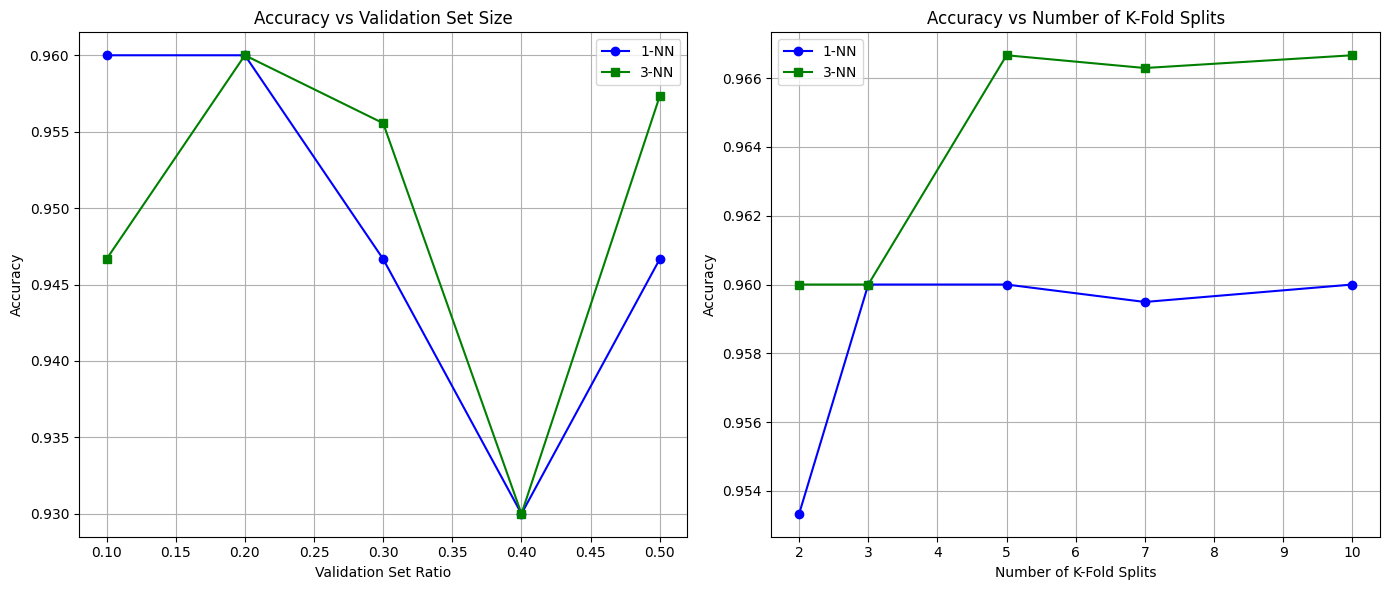

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris

# Load Iris dataset (available offline)
data = load_iris()
X, y = data.data, data.target

# Experiment parameters
split_ratios = [0.1, 0.2, 0.3, 0.4, 0.5]
kfold_splits = [2, 3, 5, 7, 10]
n_repeats = 5

def evaluate_model(X, y, val_ratio, model):
    accuracies = []
    for _ in range(n_repeats):
        X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=val_ratio)
        model.fit(X_train, y_train)
        accuracies.append(accuracy_score(y_val, model.predict(X_val)))
    return np.mean(accuracies)

def kfold_evaluate(X, y, n_splits, model):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    scores = []
    for train_idx, val_idx in kf.split(X):
        model.fit(X[train_idx], y[train_idx])
        scores.append(accuracy_score(y[val_idx], model.predict(X[val_idx])))
    return np.mean(scores)

# Models
knn1 = KNeighborsClassifier(n_neighbors=1)
knn3 = KNeighborsClassifier(n_neighbors=3)

# Validation size tests
val_size_results = {'1-NN': [], '3-NN': []}
for ratio in split_ratios:
    val_size_results['1-NN'].append(evaluate_model(X, y, ratio, knn1))
    val_size_results['3-NN'].append(evaluate_model(X, y, ratio, knn3))

# K-Fold tests
kfold_results = {'1-NN': [], '3-NN': []}
for n in kfold_splits:
    kfold_results['1-NN'].append(kfold_evaluate(X, y, n, knn1))
    kfold_results['3-NN'].append(kfold_evaluate(X, y, n, knn3))

# Plotting
plt.figure(figsize=(14, 6))

# Validation size plot
plt.subplot(1, 2, 1)
plt.plot(split_ratios, val_size_results['1-NN'], 'o-', label='1-NN', color='blue')
plt.plot(split_ratios, val_size_results['3-NN'], 's-', label='3-NN', color='green')
plt.title('Accuracy vs Validation Set Size')
plt.xlabel('Validation Set Ratio')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()

# K-Fold splits plot
plt.subplot(1, 2, 2)
plt.plot(kfold_splits, kfold_results['1-NN'], 'o-', label='1-NN', color='blue')
plt.plot(kfold_splits, kfold_results['3-NN'], 's-', label='3-NN', color='green')
plt.title('Accuracy vs Number of K-Fold Splits')
plt.xlabel('Number of K-Fold Splits')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()
